# Computer Vision Coursework Submission (INM460)

**Student name, ID and cohort:** Shreenika Aldur Krishnegowda (230016400) - PG


# Notebook Setup
In this section you should include all the code cells required to test your coursework submission. Specifically:

### Mount Google Drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Define Local Path

In the next cell you should assign to the variable `GOOGLE_DRIVE_PATH_AFTER_MYDRIVE` the relative path of this folder in your Google Drive.

**IMPORTANT:** you have to make sure that **all the files required to test your functions are loaded using this variable** (as was the case for all lab tutorials). In other words, do not use in the notebook any absolute paths. This will ensure that the markers can run your functions. Also, **do not use** the magic command `%cd` to change directory.



In [15]:
import os

# TODO: Fill in the Google Drive path where you uploaded the CW_folder_PG
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision/CW_folder_PG'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '/content/drive/MyDrive/Colab Notebooks/Shreenika_CV_CW_Folder'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['CW_Dataset', 'Code', 'Models', 'Video']


### Load packages

In the next cell you should load all the packages required to test your functions.

In [16]:
import os
import cv2
import numpy as np
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from skimage.feature import hog
from keras.preprocessing.image import img_to_array, load_img
import joblib
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from joblib import load
from keras.models import Sequential
import dlib




### Load models

In the next cell you should load all your trained models for easier testing of your functions. Avoid to load them within `MaskDetection` and `MaskDetectionVideo` to avoid having to reload them each time.

In [17]:
cnn_model = load(os.path.join(GOOGLE_DRIVE_PATH,'Models','CNN_model.pkl'))
mlp_model = load(os.path.join(GOOGLE_DRIVE_PATH,'Models','MLP_model.pkl'))
svm_model = load(os.path.join(GOOGLE_DRIVE_PATH,'Models','SVM_model.pkl'))

# Test MaskDetection

This section should allow a quick test of the `MaskDetection` function. First, add cells with the code needed to load the necessary subroutines to make `MaskDetection` work.

In [18]:
#this code will load images from test data
def load_images(images_directory, labels_directory):
    images = []
    labels = []

    for file in sorted(os.listdir(images_directory)):
        if file.endswith(".jpeg"):
            img_path = os.path.join(images_directory, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            img = img / 255.0
            images.append(img)

            label_file_name = file.replace(".jpeg", ".txt")
            label_file_path = os.path.join(labels_directory, label_file_name)

            with open(label_file_path, 'r') as label_file:
                label = int(label_file.read().strip())
                labels.append(label)

    return np.array(images), np.array(labels)



def MaskDetection(path_to_testset, trained_model):
    #HOG features will be extracted for MLP and SVM models
    if trained_model == mlp_model or trained_model == svm_model:
        hog_features = []
        for img in test_images:
            hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), multichannel=True)
            hog_features.append(hog_img.flatten())
        test_features = np.array(hog_features)
    else:
        test_features = test_images

    test_predictions = trained_model.predict(test_features)
    if trained_model == mlp_model or trained_model == svm_model:
        test_predictions_classes = test_predictions
    else:
        test_predictions_classes = np.argmax(test_predictions, axis=1)

    print("\nTest Classification Report:")
    print(classification_report(test_labels, test_predictions_classes))

    random_indices = np.random.choice(len(test_images), 4, replace=False)

    for i in random_indices:
        img = test_images[i]
        label = test_labels[i]
        prediction = test_predictions_classes[i]

        plt.imshow(img)
        plt.axis('off')
        plt.show()

        print(f"Actual Label: {label}, Predicted Label: {prediction}")


Then, make a call to the `MaskDetection` function to see what results it produces. You must also indicate the syntax needed to test your different models.

15/15 [==============================] - 3s 161ms/step

Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        51
           1       0.95      0.97      0.96       388
           2       0.00      0.00      0.00        19

    accuracy                           0.93       458
   macro avg       0.58      0.64      0.61       458
weighted avg       0.90      0.93      0.91       458



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


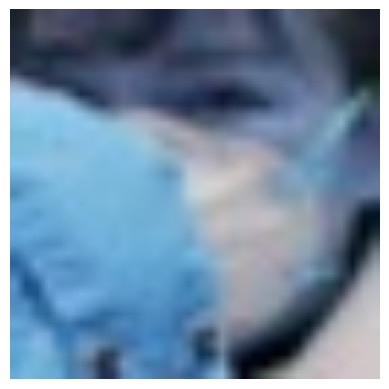

Actual Label: 1, Predicted Label: 1


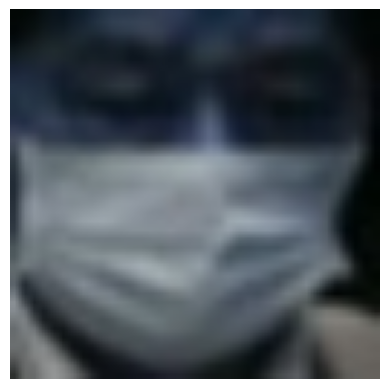

Actual Label: 1, Predicted Label: 1


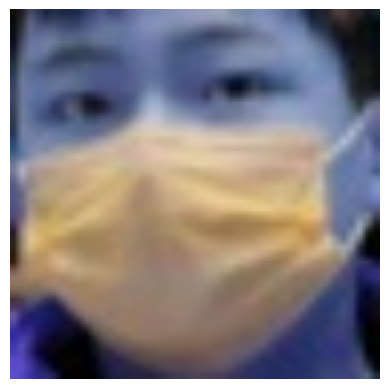

Actual Label: 1, Predicted Label: 1


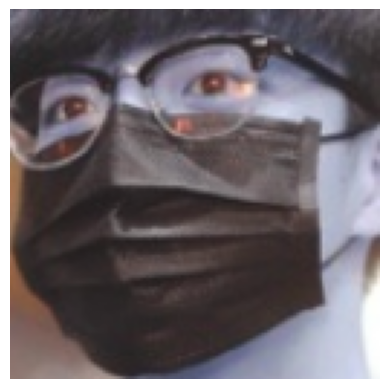

Actual Label: 1, Predicted Label: 1


In [19]:
# Syntax for the next function is the following:
#
# MaskDetection(path_to_testset, model_type)
#
# where model_type can be one of
#   - hog-svm
#   - hog-mlp
#   - cnn

#All the three trained models can be implemented on MaskDetection function un-comment the required function for demonstration we are using CNN

path_to_testset = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/test')
test_images_directory = os.path.join(path_to_testset, 'images')
test_labels_directory = os.path.join(path_to_testset, 'labels')
test_images, test_labels = load_images(test_images_directory, test_labels_directory)

MaskDetection(path_to_testset, cnn_model)

#MaskDetection(path_to_testset, mlp_model)

#MaskDetection(path_to_testset, svm_model)

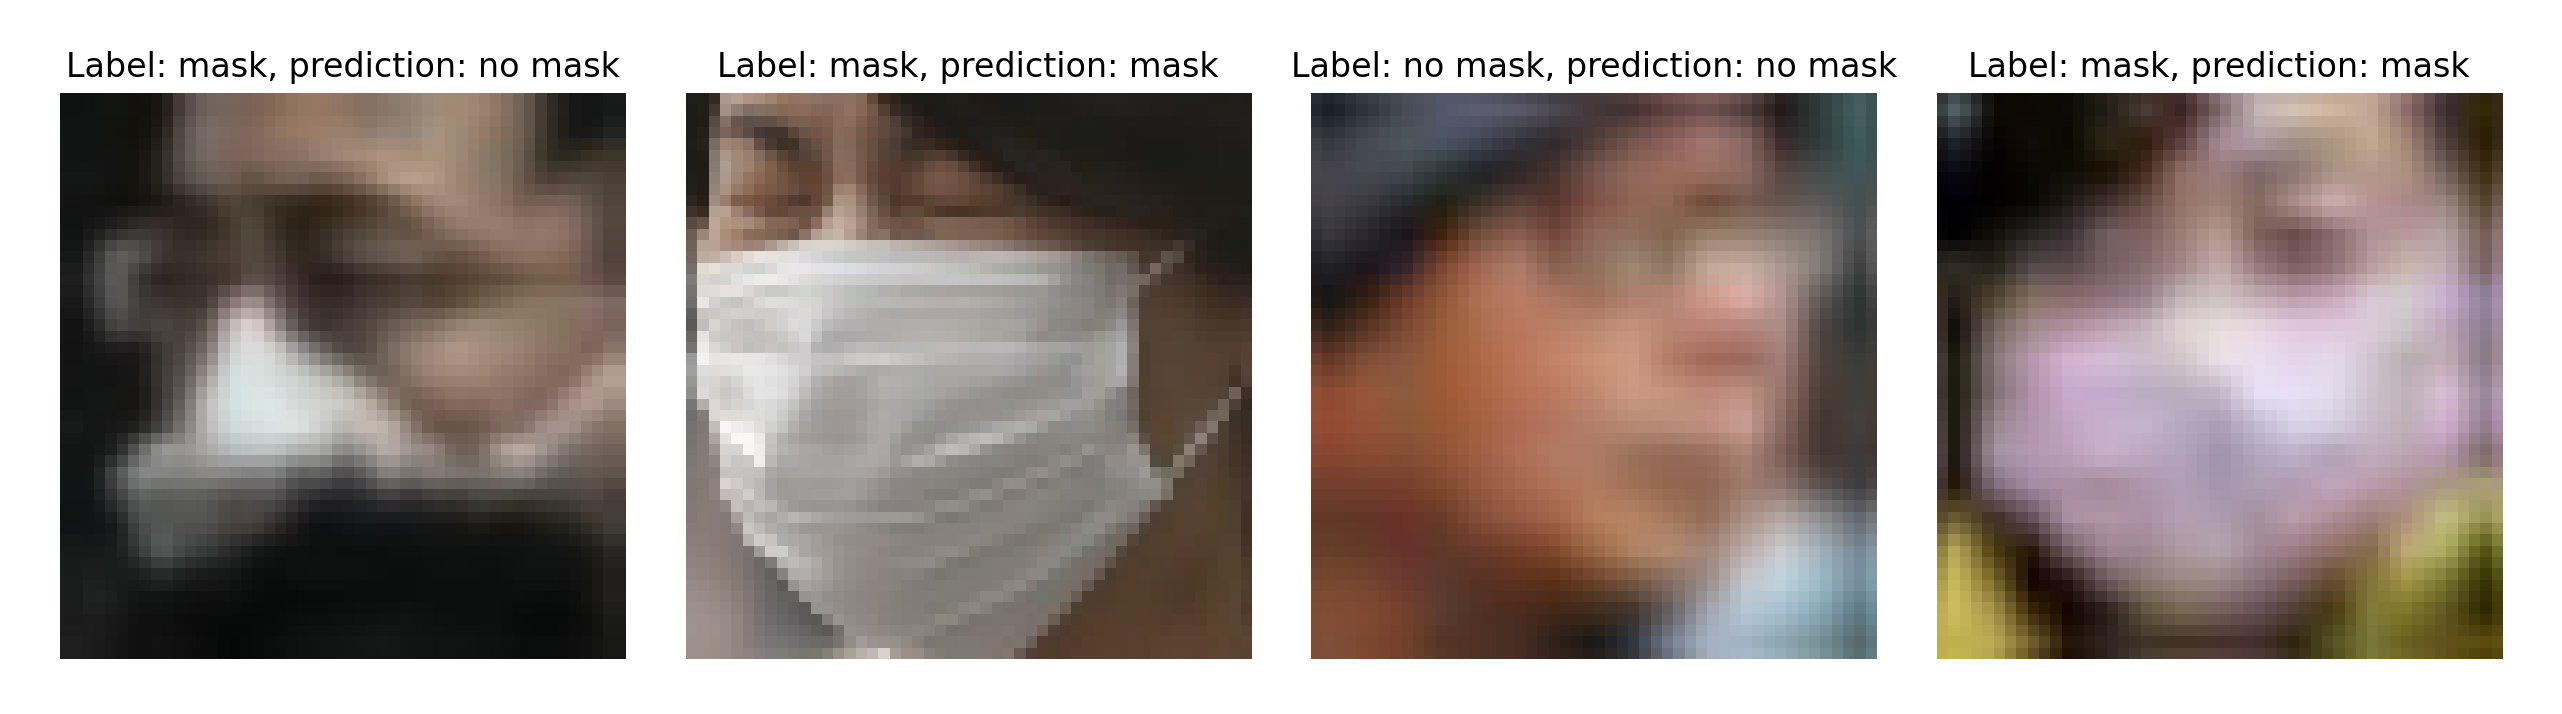

# Test MaskDetectionVideo

This section should allow a quick test of the `MaskDetectionVideo` function. First, add cells with the code needed to load the necessary subroutines to make `MaskDetectionVideo` work.

In [20]:
#This code will run face mask detection for 50 random frames from the video

def MaskDetectionVideo(video_path, face_detector, trained_model):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    random_indices = np.random.choice(frame_count, 50, replace=False)
    for i, idx in enumerate(random_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (480, 230))
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_detector(gray)
            for face in faces:
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                face_img = frame[y:y+h, x:x+w]
                face_img = cv2.resize(face_img, (128, 128))
                if trained_model == cnn_model:
                    face_input = face_img.astype('float32') / 255.0
                    face_input = np.expand_dims(face_input, axis=0)
                    prediction = np.argmax(trained_model.predict(face_input))
                else:
                    hog_features = hog(face_img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), multichannel=True)
                    prediction = trained_model.predict(hog_features.reshape(1, -1))
                label = "Mask" if prediction == 1 else "No Mask"
                color = (0, 255, 0) if prediction == 1 else (0, 0, 255)
                cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2_imshow(frame)
    cap.release()




Then, make a call to the `MaskDetectionVideo` function to see what results it produces.

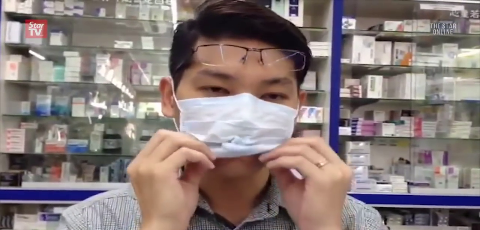

1/1 [==============================] - 0s 36ms/step


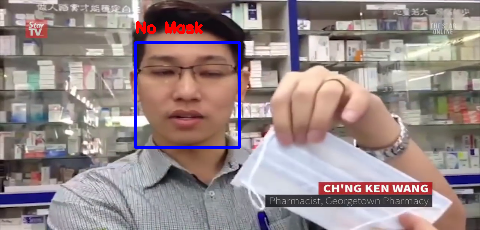

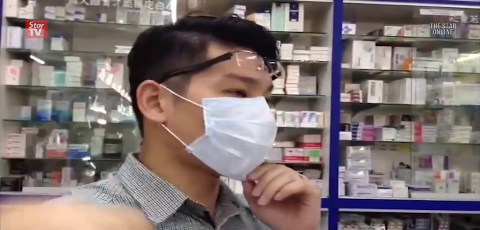

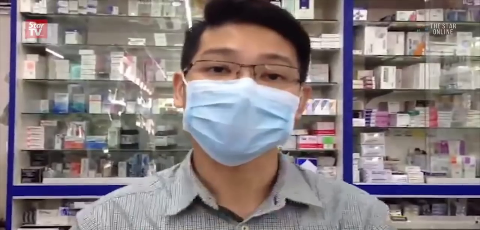

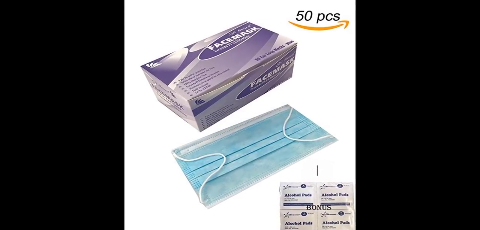

1/1 [==============================] - 0s 25ms/step


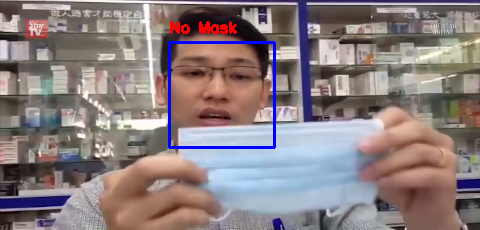

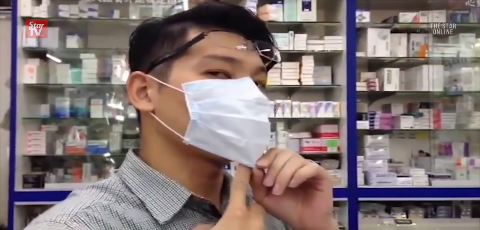

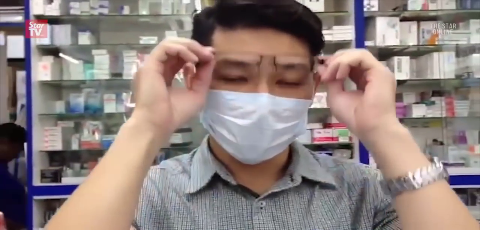

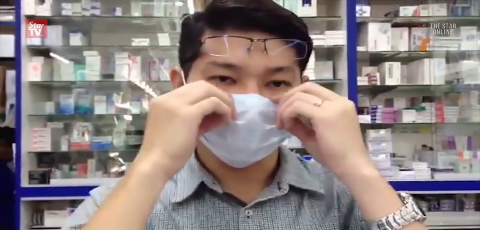

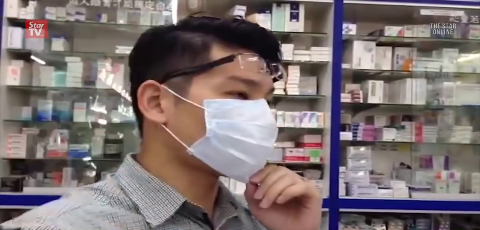

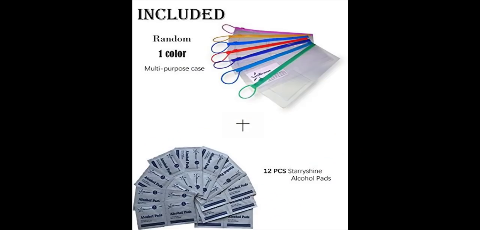

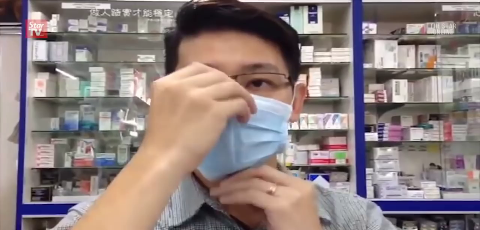

1/1 [==============================] - 0s 22ms/step


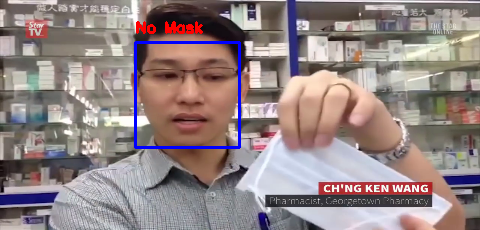

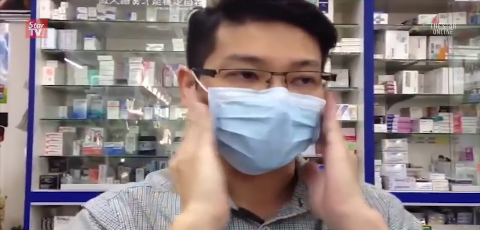

1/1 [==============================] - 0s 22ms/step


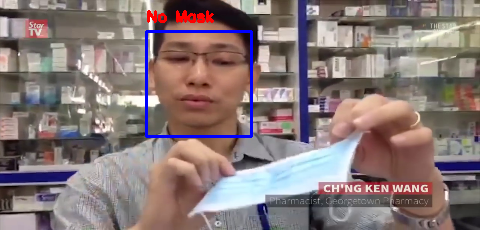

1/1 [==============================] - 0s 25ms/step


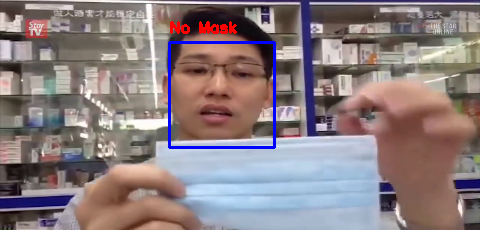

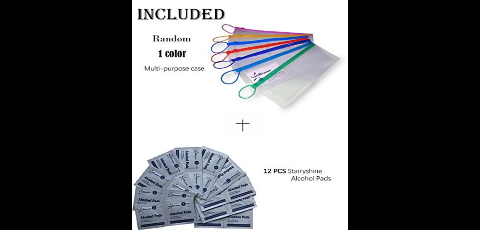

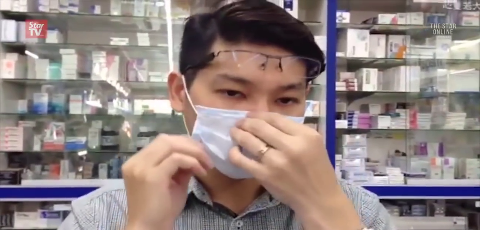

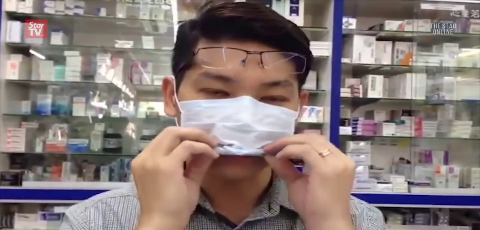

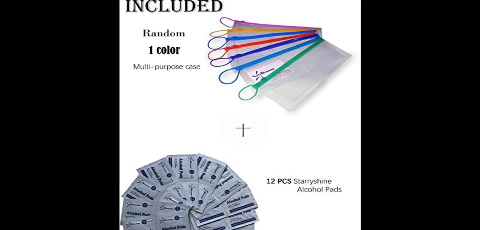

1/1 [==============================] - 0s 30ms/step


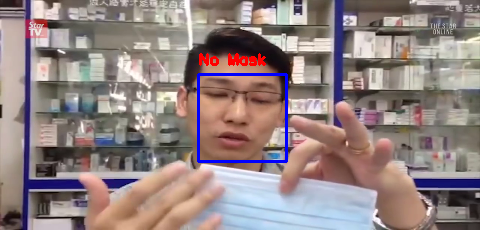

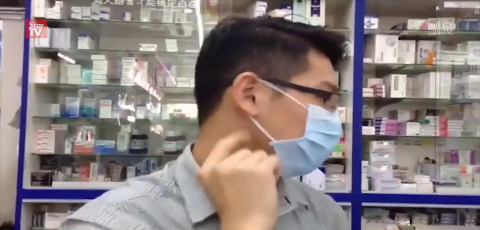

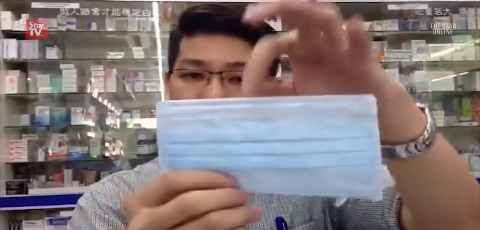

1/1 [==============================] - 0s 35ms/step


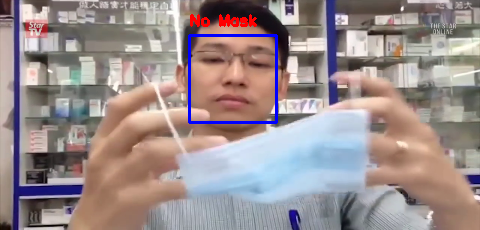

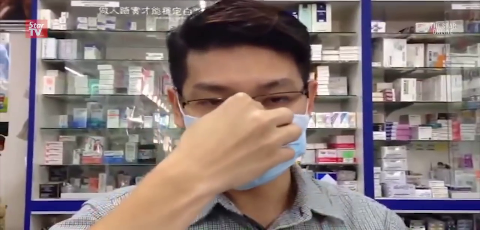

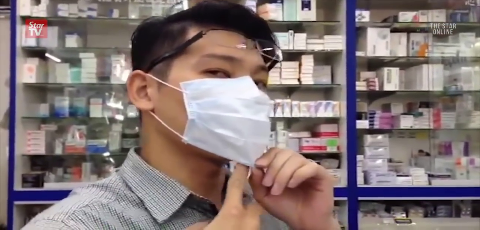

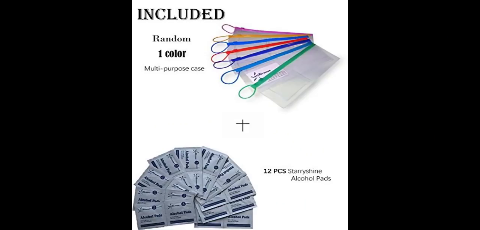

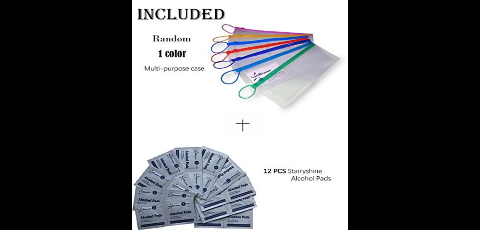

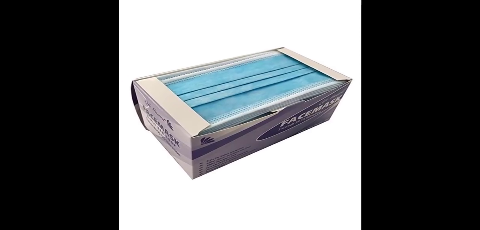

1/1 [==============================] - 0s 22ms/step


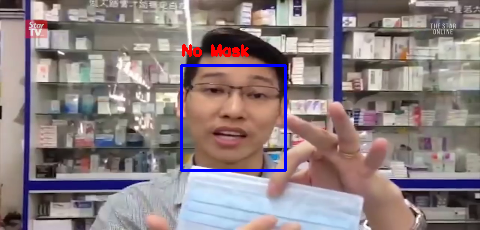

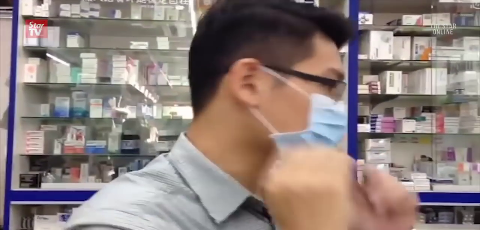

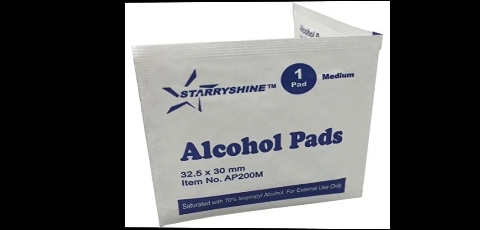

1/1 [==============================] - 0s 23ms/step


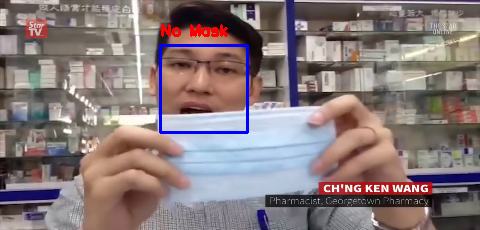

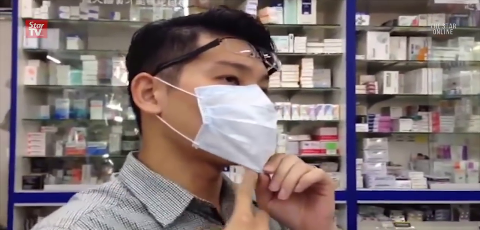

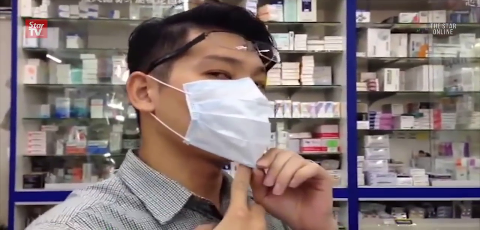

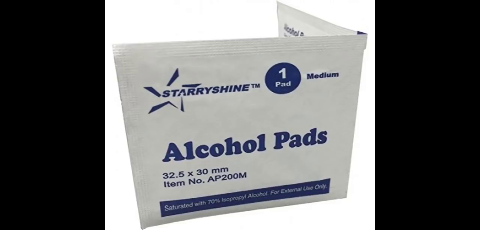

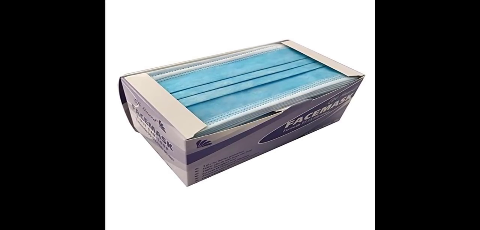

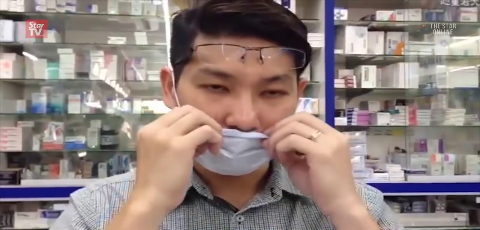

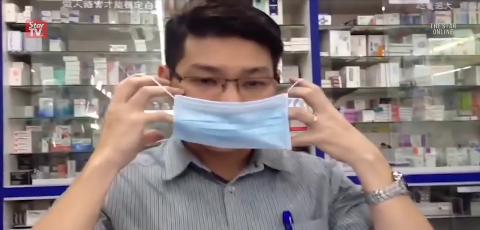

1/1 [==============================] - 0s 21ms/step


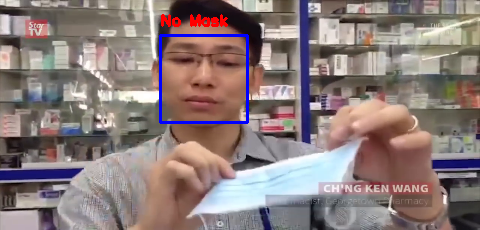

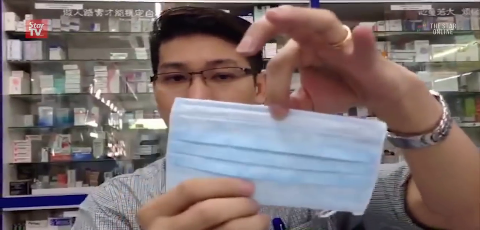

1/1 [==============================] - 0s 36ms/step


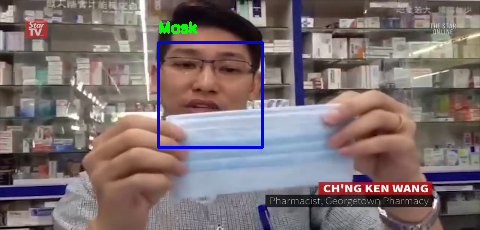

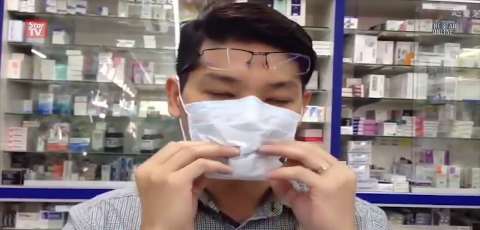

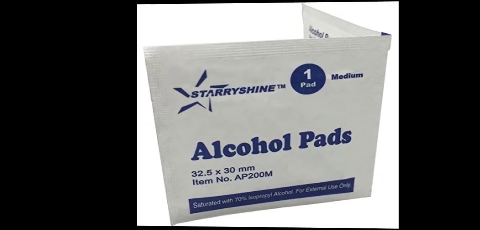

1/1 [==============================] - 0s 86ms/step


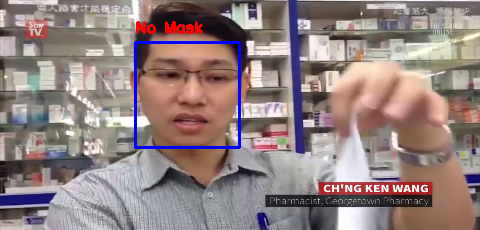

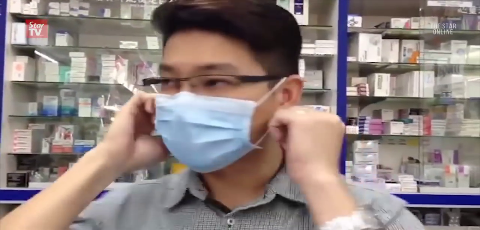

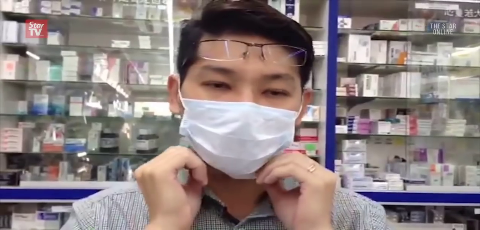

1/1 [==============================] - 0s 23ms/step


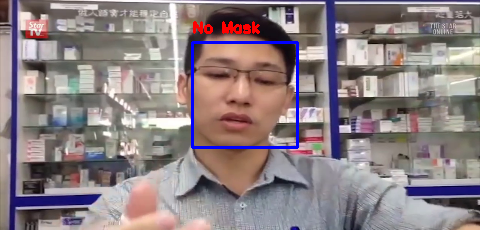

1/1 [==============================] - 0s 25ms/step


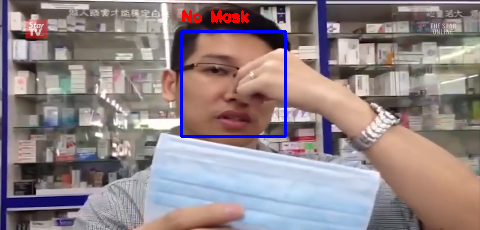

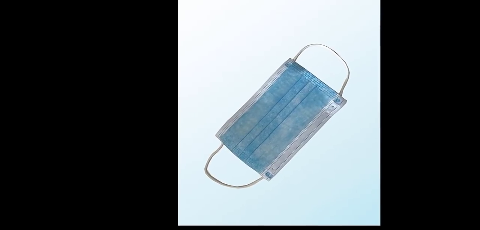

In [21]:
# Syntax for the next function is the following:
#
# MaskDetectionVideo(file)
# Example usage:
video_path = '/content/drive/MyDrive/Colab Notebooks/Shreenika_CV_CW_Folder/Video/in_the_wild.mp4'
face_detector = dlib.get_frontal_face_detector()
MaskDetectionVideo(video_path,face_detector, cnn_model)

Output hidden; open in https://colab.research.google.com to view.